In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score

In [9]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
x = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

In [13]:
from sklearn.preprocessing import  StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classify = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2)
classify.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

[[64  4]
 [ 3 29]]


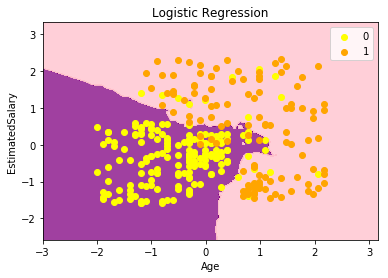

In [16]:
y_pred = classify.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train 
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classify.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), 
             alpha = 0.75, cmap = ListedColormap(("purple", "pink")))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0], x_set[y_set == j,1],
               c = ListedColormap(("yellow", "orange"))(i), label = j)

plt.title("Logistic Regression")
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plt.legend()
plt.show()